In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv(r'C:\Users\user\Downloads\titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Checking uniformity of target variabe
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### PRE-PROCESSING

In [7]:
#Removing columns which are irrelevent Survival 
df1 = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1) #Cabin has too many null values
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
#Filling null values in age with its median
df1['Age'] = df1['Age'].fillna(df1['Age'].median()) 

In [10]:
df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
df1['Embarked'] = df1['Embarked'].fillna('S')

In [12]:
df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
# Onehot Encoding 
df1 = pd.get_dummies(df1)
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

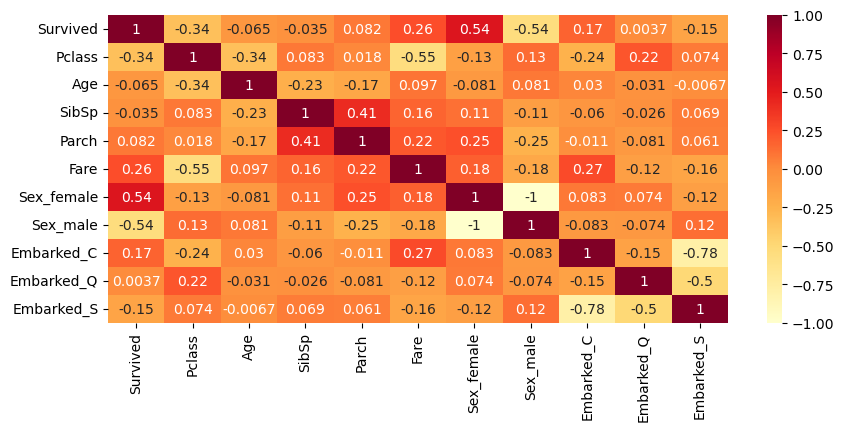

In [14]:
#Correlation Matrix
corrmatrix = df1.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,cmap='YlOrRd')

In [15]:
#Splitting x and y (features and target)
x = df1.drop('Survived',axis=1)
y = df1['Survived']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#Splitting training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### KNN- CLASSIFICATION

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [20]:
metric_k = []
neighbors = range(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(x_train, y_train)
  y_pred_kNN = classifier.predict(x_test)
  acc = accuracy_score(y_test, y_pred_kNN)
  metric_k.append(acc)

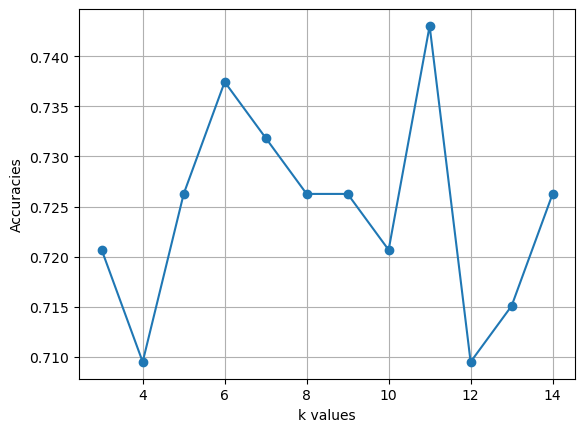

In [21]:
plt.plot(neighbors, metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()
     

In [22]:
# Building kNN model with ma. accuracy score
classifier = KNeighborsClassifier(n_neighbors=6)
classifier = classifier.fit(x_train, y_train)
y_pred_kNN = classifier.predict(x_test)
acc = accuracy_score(y_test, y_pred_kNN)

#### K-FOLD CROSS VALIDATION ON KNN MODEL

In [23]:
from sklearn.model_selection import KFold

In [24]:
kfold_validator = KFold(10)

In [25]:
#Splitting datapoints into 10 folds and displaying respecting train and test data points for 10 folds
for train_index, test_index in kfold_validator.split(x,y):
  print('Training Index:', train_index)
  print('Test Index:', test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
# Calculating cross validation score
cv_result = cross_val_score(classifier,x,y,cv=kfold_validator)
cv_result

array([0.61111111, 0.71910112, 0.73033708, 0.71910112, 0.70786517,
       0.69662921, 0.73033708, 0.68539326, 0.75280899, 0.76404494])

In [28]:
# Finding mean of cross validation score
np.mean(cv_result)

0.7116729088639201

#### STRATIFIED K FOLD CROSS VALIDATION ON KNN MODEL

In [29]:
from sklearn.model_selection import StratifiedKFold

In [30]:
skfold_validator = StratifiedKFold(n_splits=10)

In [32]:
# Splitting datapoints into 10 folds and displaying respecting train and test data points for 10 folds
for train_index, test_index in skfold_validator.split(x,y):
  print('Training Index:', train_index)
  print('Test Index:', test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [33]:
skcv_result = cross_val_score(classifier,x,y, cv=skfold_validator)

In [34]:
# stratified cross validation scores
skcv_result

array([0.61111111, 0.70786517, 0.69662921, 0.76404494, 0.74157303,
       0.68539326, 0.76404494, 0.70786517, 0.69662921, 0.75280899])

In [35]:
# mean of stratified cross validation scores
np.mean(skcv_result)

0.712796504369538

### SVM MODEL

In [36]:
#Importing logistic regression model from sklearn
from sklearn.svm import SVC

In [37]:
#Building SVM model for linear kernel
svm_clf = SVC(kernel='linear')
svm_clf = svm_clf.fit(x_train,y_train)
y_pred_sm = svm_clf.predict(x_test) 

In [38]:
accuracy_score(y_test,y_pred_sm)

0.7821229050279329

#### K-FOLD CROSS VALIDATION ON SVM MODEL

In [39]:
kfold_validator = KFold(10)

In [40]:
#Splitting datapoints into 10 folds and displaying respecting train and test data points for 10 folds
for train_index, test_index in kfold_validator.split(x,y):
  print('Training Index:', train_index)
  print('Test Index:', test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [41]:
cv_result = cross_val_score(svm_clf,x,y,cv=kfold_validator)
cv_result

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [42]:
np.mean(cv_result)

0.786729088639201

#### STRATIFIED K FOLD CROSS VALIDATION ON SVM MODEL

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
skfold_validator = StratifiedKFold(n_splits=10)

In [45]:
#Splitting datapoints into 10 folds and displaying respecting train and test data points for 10 folds
for train_index, test_index in skfold_validator.split(x,y):
  print('Training Index:', train_index)
  print('Test Index:', test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [46]:
skcv_result = cross_val_score(svm_clf,x,y, cv=skfold_validator)

In [48]:
# stratified cross validation score
skcv_result

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [49]:
# Mean of Stratified cross validation score
np.mean(skcv_result)

0.786729088639201